**Análisis de modelos**

**Preparación de datos**

Importamos los datos, preparamos el dataset y creamos los conjuntos de entrenamiento.

Creamos conjuntos de entrenamiento con diferentes algoritmos de oversampling

In [1]:
from sklearn.model_selection import train_test_split
from src.data_utils.data_utils import read_data, prepare_dummy_cols, normalize_num_vars

excel_file_path = "D:\\develop\\predict_lapse\\data\\BBDD_Impago_1.0.xlsx"

df = read_data(excel_file_path)

cat_vars = ['Canal', 'Domiciliacion', 'Figuras', 'Motor', 'Pago', 'SegundoConductor', 'Tipo_Furgoneta', 'Tipo_Moto', 'Tipo_Turismo',  'Zonas_Zona1', 'Zonas_Zona2', 'Zonas_Zona3', 'Zonas_Zona4', 'Zonas_Zona5', 'Zonas_Zona6', 'Zonas_Zona7', 'Zonas_Zona8']

feature_cols = ['Pago', 'Domiciliacion', 'Anyomatricula', 'Prima', 'Valor',
                'ValorVehículo', 'Motor_2', 'Motor_3', 'Canal', 'Socioec', 'Antigüedad', 'Carnet', 'SegundoConductor', 'Figuras', 'Tipo_Moto', 'Tipo_Turismo', 'Zonas_Zona2', 'Zonas_Zona3', 'Zonas_Zona4', 'Zonas_Zona5', 'Zonas_Zona6', 'Zonas_Zona7', 'Zonas_Zona8']

df_dummy = prepare_dummy_cols(df, ['Tipo', 'Zonas', 'Motor'] )

num_vars = ['Anyomatricula', 'Valor', 'Prima', 'ValorVehículo', 'Socioec','Antigüedad', 'Carnet']

X = df_dummy[feature_cols]
y = df['Impago']

# Importante que la variable objetivo se distribuya en el conjunto de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = normalize_num_vars(X_train, num_vars)
X_test = normalize_num_vars(X_test, num_vars)




Aplicamos diferentes alogoritmos de oversampling y comprobamos cómo funcionan con el modelo de regresión logística.

In [14]:
from src.model_utils.oversampling import over_sm, over_adasyn, over_bsm, over_svmsm, over_random

# Generamos los dataset con los diferentes métodos de oversampling
X_train_ro, y_train_ro = over_random(X_train, y_train)
X_train_sm, y_train_sm = over_sm(X_train, y_train)
X_train_adasyn, y_train_adasyn = over_adasyn(X_train, y_train)
X_train_bsm, y_train_bsm = over_bsm(X_train, y_train)
X_train_svmsm, y_train_svmsm = over_svmsm(X_train, y_train, 0.1)



In [2]:
param_grid_rf = {
    "max_depth": [6, 9, 14],
    "min_samples_split": [2, 5, 10, 20, 50],
    "min_samples_leaf": [3, 6, 10, 20],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True],
    "class_weight": ["balanced", "balanced_subsample"],
    "max_samples": [0.7, 0.9]
}

param_grid_rf_2 = {
    "class_weight": ["balanced", "balanced_subsample"],

    "max_depth": [12, 14, 16, 18],
    "max_features": ["sqrt", "log2", 0.3],

    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [2, 3, 4, 6],

    "max_samples": [0.8, 0.9, 1.0],

    "n_estimators": [400, 700, 1000],

    "ccp_alpha": [0.0, 1e-4],
}

param_grid_rf_3 = {
    "bootstrap": [True],
    "class_weight": ["balanced_subsample"],

    # Complejidad del árbol (regularización)
    "max_depth": [12, 16, 18],
    "min_samples_leaf": [3, 8, 15],
    "min_samples_split": [2, 20],

    # Aleatoriedad / bagging
    "max_features": [0.3, "sqrt"],
    "max_samples": [0.7, 0.9],

    # Poda (muy útil para recortar sobreajuste)
    "ccp_alpha": [0.0, 1e-4, 1e-3],

    # Estabilidad (no hace falta probar 1000 valores)
    "n_estimators": [600],
}

param_grid_rf_4 = {
    "bootstrap": [True],
    "class_weight": ["balanced_subsample"],

    # Mantén estable (o prueba 2 valores si quieres)
    "n_estimators": [600, 900],

    # Capacidad
    "max_depth": [16, 18],
    "max_features": [0.3, "sqrt"],
    "max_samples": [0.6, 0.7, 0.8],

    # Regularización (lo más importante)
    "min_samples_leaf": [3, 6, 10, 15],
    "min_samples_split": [2, 10, 20, 50],
    "ccp_alpha": [0.0, 1e-5, 1e-4, 5e-4, 1e-3],
}


param_grid_xgb = {
    "n_estimators": [300, 600],
    "learning_rate": [0.03, 0.07],
    "max_depth": [3, 4, 5],
    "min_child_weight": [1, 5, 10],
    "subsample": [0.7, 0.9],
    "colsample_bytree": [0.6, 0.8],
    "gamma": [0, 1, 2],
    "reg_lambda": [1, 5, 10],
    "reg_alpha": [0, 1, 3],
    "scale_pos_weight" : [10, 20, 30, 40]
}

param_grid_xgb_2 = {
    "max_depth": [4, 5, 6],
    "min_child_weight": [8, 10],      # cerca de 10
    "gamma": [0.5, 1.0],              # cerca de 1
    "subsample": [0.85, 0.9],         # cerca de 0.9
    "colsample_bytree": [0.75, 0.8],  # cerca de 0.8
    "scale_pos_weight": [8, 10],      # cerca de 10

    # dejo lo tuyo como ancla
    "learning_rate": [0.03],
    "n_estimators": [300],
    "reg_alpha": [0],
    "reg_lambda": [1],
}

param_grid_xgb_3 = {
    # estructura (alrededor de tu mejor)
    "max_depth": [4, 5, 6],
    "min_child_weight": [6, 8, 10],     # tu mejor=8, miro vecinos
    "gamma": [0.0, 0.5, 1.0],            # tu mejor=0.5

    # muestreo (alrededor de tu mejor)
    "subsample": [0.8, 0.9, 1.0],        # tu mejor=0.9
    "colsample_bytree": [0.7, 0.8, 0.9], # tu mejor=0.8

    # desbalanceo (alrededor de tu mejor)
    "scale_pos_weight": [6, 8, 10],      # tu mejor=8

    # fijo de momento para no explotar combinaciones
    "learning_rate": [0.03],
    "n_estimators": [300],
    "reg_alpha": [0],
    "reg_lambda": [1],
}

param_grid_xgb_4 = {
    # estructura (alrededor del óptimo)
    "max_depth": [4, 5, 6],
    "min_child_weight": [4, 6, 8],
    "gamma": [0.0, 0.1, 0.3],     # ya vimos que 0.5->0.0 mejoró, afinamos cerca de 0

    # muestreo
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9],

    # desbalanceo
    "scale_pos_weight": [5, 6, 7, 8],

    # regularización (aquí suele haber mejora real)
    "reg_alpha": [0, 0.5, 1],
    "reg_lambda": [0.5, 1, 2, 5],

    # fijo para no explotar combinaciones
    "learning_rate": [0.03],
    "n_estimators": [300],
}


param_grid_lgbm = {
    # core
    "n_estimators": [600, 1200],
    "learning_rate": [0.03, 0.05],

    # estructura del árbol (controla overfitting)
    "num_leaves": [31, 63, 127],
    "min_child_samples": [10, 30, 60],
    "max_depth": [-1, 10, 15],

    # muestreo (muy útil con desbalanceo)
    "subsample": [0.7, 0.9],
    "colsample_bytree": [0.6, 0.8],

    # regularización
    "reg_alpha": [0.0, 0.5, 1.0],
    "reg_lambda": [0.0, 1.0, 5.0],
}

param_grid_lgbm_2 = {
    "n_estimators": [900, 1200],
    "learning_rate": [0.03],

    "num_leaves": [31, 63, 127],
    "min_child_samples": [30, 60, 90],
    "max_depth": [-1],

    "subsample": [0.7],
    "colsample_bytree": [0.8],

    "reg_alpha": [0.5],
    "reg_lambda": [5.0],

}
{'colsample_bytree': 0.8, 'learning_rate': 0.03, 'max_depth': -1, 'min_child_samples': 60, 'n_estimators': 1200, 'num_leaves': 31, 'reg_alpha': 0.5, 'reg_lambda': 5.0, 'subsample': 0.7}



param_grid_lgbm_3 = {
    "learning_rate": [0.03],
    "n_estimators": [900, 1200],
    "max_depth": [-1],

    "num_leaves": [63, 95, 127, 159],
    "min_child_samples": [60, 75, 90, 120],

    "subsample": [0.6, 0.7, 0.8],
    "colsample_bytree": [0.7, 0.8, 0.9],

    "reg_alpha": [0.0, 0.5, 1.0],
    "reg_lambda": [3.0, 5.0, 8.0],

    "min_split_gain": [0.0, 0.02, 0.05, 0.10],
}


param_grid_lgbm_4 = {
    "learning_rate": [0.03],
    "n_estimators": [800, 1200, 1600],

    "num_leaves": [63, 127, 159],
    "min_child_samples": [60, 75, 100, 140],

    "min_split_gain": [0.05, 0.1, 0.15],

    "subsample": [0.55, 0.6, 0.7],
    "colsample_bytree": [0.8, 0.9, 1.0],

    "reg_lambda": [5.0, 8.0, 12.0],
    "reg_alpha": [0.0],     # ya viste que tender a 0
    "max_depth": [-1],
}
#
# results = []

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from contextlib import contextmanager
from tqdm.auto import tqdm
import joblib
from sklearn.model_selection import ParameterGrid


rf = RandomForestClassifier(
    random_state=42,
    bootstrap=True,
    n_jobs=1
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf_4,
    scoring="average_precision",   # PR-AUC (mejor para 3% positivos)
    cv=cv,
    n_jobs=-1,
    verbose=2
)

@contextmanager
def tqdm_joblib(tqdm_object):
    class TqdmBatchCompletionCallback(joblib.parallel.BatchCompletionCallBack):
        def __call__(self, *args, **kwargs):
            tqdm_object.update(n=self.batch_size)
            return super().__call__(*args, **kwargs)

    old_cb = joblib.parallel.BatchCompletionCallBack
    joblib.parallel.BatchCompletionCallBack = TqdmBatchCompletionCallback
    try:
        yield tqdm_object
    finally:
        joblib.parallel.BatchCompletionCallBack = old_cb
        tqdm_object.close()

total_fits = len(list(ParameterGrid(param_grid_rf_4))) * cv.get_n_splits()

with tqdm_joblib(tqdm(total=total_fits, desc="GridSearch fits")):
    grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

GridSearch fits:   0%|          | 0/9600 [00:00<?, ?it/s]

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
{'bootstrap': True, 'ccp_alpha': 1e-05, 'class_weight': 'balanced_subsample', 'max_depth': 18, 'max_features': 0.3, 'max_samples': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 600}
0.4848308347135607


In [28]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from contextlib import contextmanager
from tqdm.auto import tqdm
import joblib
from sklearn.model_selection import ParameterGrid
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="aucpr",      # coherente con PR-AUC
    tree_method="hist",       # rápido
    n_jobs=1,
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb_5,
    scoring="average_precision",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

@contextmanager
def tqdm_joblib(tqdm_object):
    class TqdmBatchCompletionCallback(joblib.parallel.BatchCompletionCallBack):
        def __call__(self, *args, **kwargs):
            tqdm_object.update(n=self.batch_size)
            return super().__call__(*args, **kwargs)

    old_cb = joblib.parallel.BatchCompletionCallBack
    joblib.parallel.BatchCompletionCallBack = TqdmBatchCompletionCallback
    try:
        yield tqdm_object
    finally:
        joblib.parallel.BatchCompletionCallBack = old_cb
        tqdm_object.close()

total_fits = len(list(ParameterGrid(param_grid_xgb_5))) * cv.get_n_splits()

with tqdm_joblib(tqdm(total=total_fits, desc="GridSearch fits")):
    grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

GridSearch fits:   0%|          | 0/58320 [00:00<?, ?it/s]

Fitting 5 folds for each of 11664 candidates, totalling 58320 fits
{'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 300, 'reg_alpha': 1, 'reg_lambda': 0.5, 'scale_pos_weight': 5, 'subsample': 1.0}
0.5412007331384419


In [53]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from contextlib import contextmanager
from tqdm.auto import tqdm
import joblib
from sklearn.model_selection import ParameterGrid

spw = (y_train == 0).sum() / (y_train == 1).sum()

lgbm = LGBMClassifier(
    objective="binary",
    random_state=42,
    n_jobs=1,
    # muy importante en tu caso:
    # class_weight="balanced",
    scale_pos_weight=spw,
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgbm_4,
    scoring="average_precision",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

@contextmanager
def tqdm_joblib(tqdm_object):
    class TqdmBatchCompletionCallback(joblib.parallel.BatchCompletionCallBack):
        def __call__(self, *args, **kwargs):
            tqdm_object.update(n=self.batch_size)
            return super().__call__(*args, **kwargs)

    old_cb = joblib.parallel.BatchCompletionCallBack
    joblib.parallel.BatchCompletionCallBack = TqdmBatchCompletionCallback
    try:
        yield tqdm_object
    finally:
        joblib.parallel.BatchCompletionCallBack = old_cb
        tqdm_object.close()

total_fits = len(list(ParameterGrid(param_grid_lgbm_4))) * cv.get_n_splits()

with tqdm_joblib(tqdm(total=total_fits, desc="GridSearch fits")):
    grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

GridSearch fits:   0%|          | 0/14580 [00:00<?, ?it/s]

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
{'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': -1, 'min_child_samples': 140, 'min_split_gain': 0.1, 'n_estimators': 1200, 'num_leaves': 127, 'reg_alpha': 0.0, 'reg_lambda': 5.0, 'subsample': 0.55}
0.5474295850909114


In [10]:
from src.model_utils.utils import hyperparameter_tuning
import numpy as np
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=42, n_jobs=-1)

param_dist_rf = {
    'n_estimators': [500, 600, 700, 900],
    'max_depth': [5,8,12],  # Limitar la profundidad para evitar el sobreajuste
    'min_samples_split': [5, 10, 20],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [4, 8, 10],  # Número mínimo de muestras en las hojas
    'max_features': ['sqrt', 'log2', 0.3]
}

# Parámetros a optimizar para GradientBoosting
param_dist_gbm = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.03, 0.05],
    'max_depth': [2, 3, 4],
    'min_samples_split': [20, 50, 80],
    'min_samples_leaf': [10, 20, 50],
    'subsample': [0.5, 0.7, 0.8],
    "max_features": ["sqrt", "log2"]
}

n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
scale_pos_weight = n_neg / n_pos
scale_pos_weight

# Parámetros a optimizar para XGBoost
param_dist_xgb = {
    'n_estimators': [300, 400, 600],
    'learning_rate': [0.03, 0.05],
    'max_depth': [2, 3, 4],
    'subsample': [0.5, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.8],
    "gamma": [1, 2, 5, 10],
    "reg_lambda": [2, 5, 10, 20],
    "reg_alpha": [0.5, 1, 2],
    "min_child_weight": [10, 20, 30, 50],
    "scale_pos_weight": [scale_pos_weight]
}

param_dist_lgbm = {
    'objetive':["binary"],
    'n_estimators': [400, 500, 600],
    'num_leaves': [15, 25, 30, 45, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_split_gain' : [0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.6, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.8],
    'min_child_samples': [50, 80, 100],
    'reg_alpha': [0, 0.1, 0.5],  # Regularización L1
    'reg_lambda': [5, 10, 20]  # Regularización L2
}

param_dist_catboost = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],  # Regularización L2
    'bagging_temperature': [0, 0.5, 1]
}

# Crear un diccionario con los parámetros de búsqueda para cada modelo
param_dist = {
    "Random_Forest": param_dist_rf,
    "GBM_sklearn": param_dist_gbm,
    "XGBoost": param_dist_xgb,
    "LightGBM": param_dist_lgbm,
    "CatBoost": param_dist_catboost
}

models_not_smote = ["XGBoost", "LightGBM", "CatBoost"]
best_params_models = []

for name, model in models.items():
    if name not in models_not_smote:
        print(f"\nCalculamos selección de hiperparámetros para el modelo {name} con datos de entrenamiento con Oversampling")
        best_model, random_search, best_params =  hyperparameter_tuning(name, model, param_dist, X_train_bsm, y_train_bsm)
        best_params_models.append({name:best_params})
    else:
        print(f"\nCalculamos selección de hiperparámetros para el modelo {name} con datos de entrenamiento sin Oversampling")
        best_model, random_search, best_params =  hyperparameter_tuning(name, model, param_dist, X_train, y_train)
        best_params_models.append({name:best_params})

print("Mostramos resumen de mejores hiperparámetros")
best_params_models





Calculamos selección de hiperparámetros para el modelo Random_Forest con datos de entrenamiento con Oversampling


KeyboardInterrupt: 

Por último, ejecutamos los modelos con los mejores parámetros conseguidos.

[Random_Forest] Accuracy train: 0.9729 | test: 0.9557
[Random_Forest] Balanced Acc train: 0.9860 | test: 0.7883
[Random_Forest] Precision(1): 0.3535 | Recall(1): 0.6105 | F1(1): 0.4478
[Random_Forest] Confusion matrix (test):
[[5481  192]
 [  67  105]]


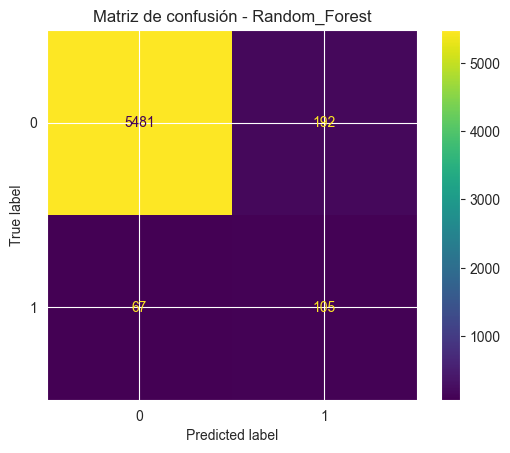

AUC-ROC (train): 0.9973
AUC-ROC (test) : 0.8857
PR-AUC  (train): 0.9110
PR-AUC  (test) : 0.5270
[Random_Forest] Accuracy train: 0.9710 | test: 0.9322
[Random_Forest] Balanced Acc train: 0.9851 | test: 0.8044
[Random_Forest] Precision(1): 0.2533 | Recall(1): 0.6686 | F1(1): 0.3674
[Random_Forest] Confusion matrix (test):
[[5334  339]
 [  57  115]]


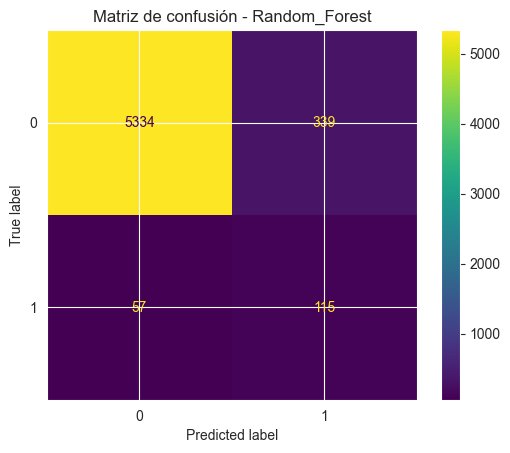

AUC-ROC (train): 0.9957
AUC-ROC (test) : 0.8812
PR-AUC  (train): 0.8774
PR-AUC  (test) : 0.5052
[Random_Forest] Accuracy train: 0.9729 | test: 0.9557
[Random_Forest] Balanced Acc train: 0.9861 | test: 0.7911
[Random_Forest] Precision(1): 0.3545 | Recall(1): 0.6163 | F1(1): 0.4501
[Random_Forest] Confusion matrix (test):
[[5480  193]
 [  66  106]]


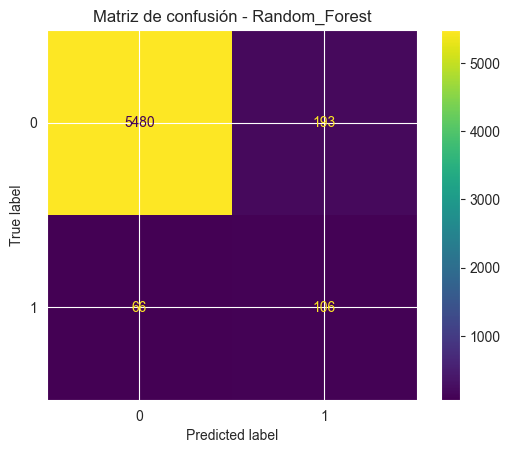

AUC-ROC (train): 0.9970
AUC-ROC (test) : 0.8952
PR-AUC  (train): 0.9040
PR-AUC  (test) : 0.5352
[Random_Forest] Accuracy train: 0.9763 | test: 0.9584
[Random_Forest] Balanced Acc train: 0.9878 | test: 0.7813
[Random_Forest] Precision(1): 0.3709 | Recall(1): 0.5930 | F1(1): 0.4564
[Random_Forest] Confusion matrix (test):
[[5500  173]
 [  70  102]]


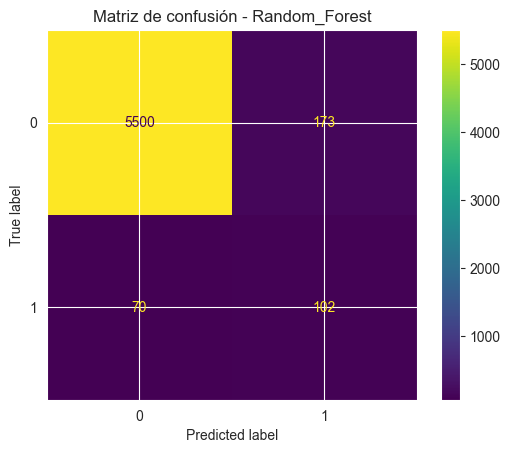

AUC-ROC (train): 0.9977
AUC-ROC (test) : 0.8929
PR-AUC  (train): 0.9355
PR-AUC  (test) : 0.5252
[ro] Accuracy train: 0.9710 | test: 0.9322
[ro] Balanced Acc train: 0.9851 | test: 0.8044
[ro] Precision(1): 0.2533 | Recall(1): 0.6686 | F1(1): 0.3674
[ro] Confusion matrix (test):
[[5334  339]
 [  57  115]]


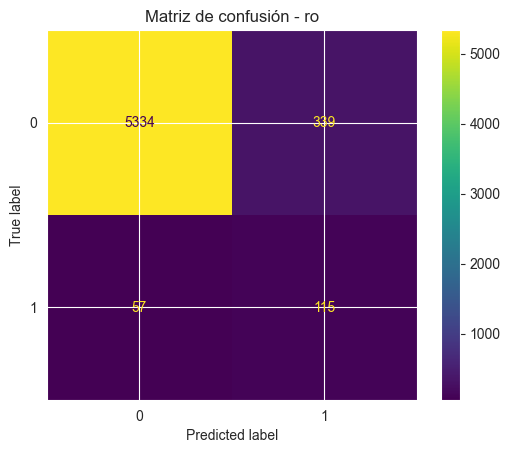

AUC-ROC (train): 0.9957
AUC-ROC (test) : 0.8812
PR-AUC  (train): 0.8774
PR-AUC  (test) : 0.5052


In [36]:
from src.model_utils.mod_evaluation import run_model_and_evaluate
from sklearn.ensemble import RandomForestClassifier


{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 14, 'max_features': 'sqrt', 'max_samples': 0.9, 'min_samples_leaf': 3, 'min_samples_split': 2}
{'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'max_depth': 18, 'max_features': 0.3, 'max_samples': 0.9, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 1000}
{'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'max_depth': 18, 'max_features': 0.3, 'max_samples': 0.9, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 1000}
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'max_depth': 18, 'max_features': 0.3, 'max_samples': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 600}

results = []

model = RandomForestClassifier(
            n_estimators=600, random_state=42,
            n_jobs=-1,
            max_depth=18,
            min_samples_leaf=3,
            min_samples_split=2,
            max_features=0.3,
            bootstrap=True,
            class_weight='balanced_subsample',
            max_samples=0.7,
            ccp_alpha=0
        )

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model
            )
results.append({**ex, **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "svm_smote", 0.1
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "svm_smote", 0.05
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "ro", 0.05
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'ro', model,
                "svm_smote", 0.1
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})


[Random_Forest] Accuracy train: 0.9734 | test: 0.9567
[Random_Forest] Balanced Acc train: 0.9863 | test: 0.7888
[Random_Forest] Precision(1): 0.3608 | Recall(1): 0.6105 | F1(1): 0.4536
[Random_Forest] Confusion matrix (test):
[[5487  186]
 [  67  105]]


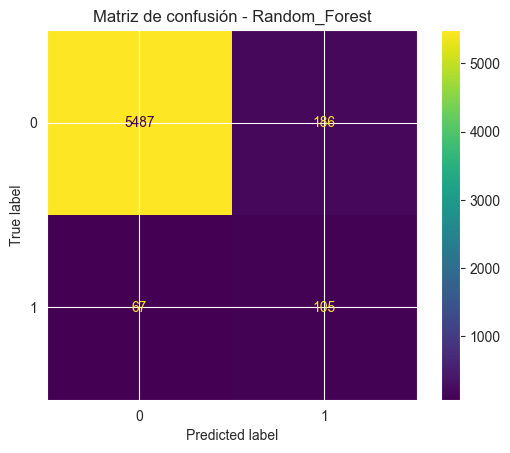

AUC-ROC (train): 0.9986
AUC-ROC (test) : 0.8930
PR-AUC  (train): 0.9499
PR-AUC  (test) : 0.5289
[Random_Forest] Accuracy train: 0.9754 | test: 0.9343
[Random_Forest] Balanced Acc train: 0.9873 | test: 0.8027
[Random_Forest] Precision(1): 0.2591 | Recall(1): 0.6628 | F1(1): 0.3725
[Random_Forest] Confusion matrix (test):
[[5347  326]
 [  58  114]]


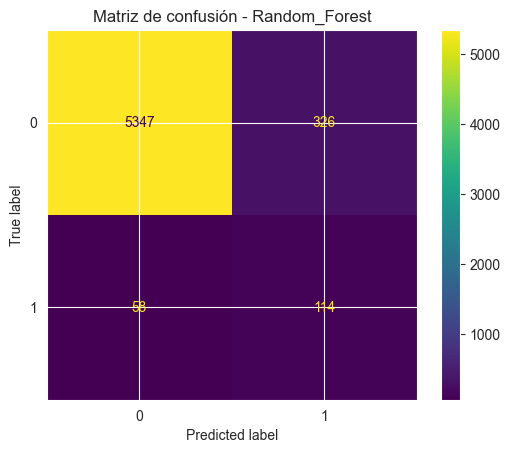

AUC-ROC (train): 0.9975
AUC-ROC (test) : 0.8785
PR-AUC  (train): 0.9215
PR-AUC  (test) : 0.5058
[Random_Forest] Accuracy train: 0.9749 | test: 0.9545
[Random_Forest] Balanced Acc train: 0.9871 | test: 0.7849
[Random_Forest] Precision(1): 0.3444 | Recall(1): 0.6047 | F1(1): 0.4388
[Random_Forest] Confusion matrix (test):
[[5475  198]
 [  68  104]]


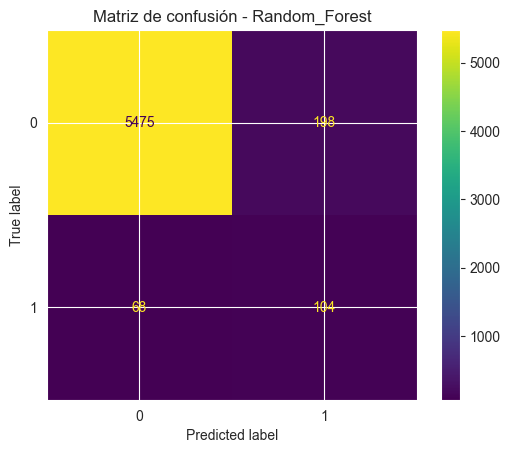

AUC-ROC (train): 0.9984
AUC-ROC (test) : 0.8909
PR-AUC  (train): 0.9447
PR-AUC  (test) : 0.5358
[Random_Forest] Accuracy train: 0.9704 | test: 0.9540
[Random_Forest] Balanced Acc train: 0.9848 | test: 0.7931
[Random_Forest] Precision(1): 0.3441 | Recall(1): 0.6221 | F1(1): 0.4431
[Random_Forest] Confusion matrix (test):
[[5469  204]
 [  65  107]]


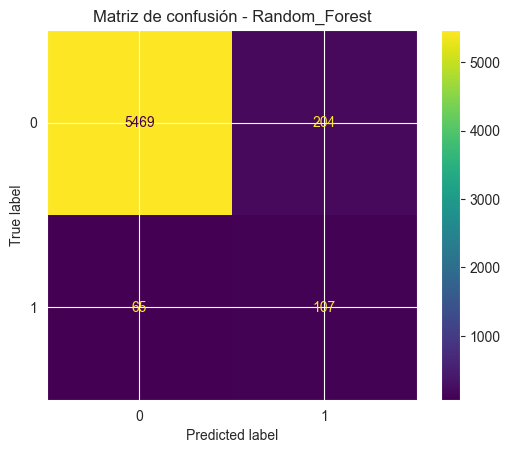

AUC-ROC (train): 0.9988
AUC-ROC (test) : 0.8906
PR-AUC  (train): 0.9629
PR-AUC  (test) : 0.5224
[ro] Accuracy train: 0.9754 | test: 0.9343
[ro] Balanced Acc train: 0.9873 | test: 0.8027
[ro] Precision(1): 0.2591 | Recall(1): 0.6628 | F1(1): 0.3725
[ro] Confusion matrix (test):
[[5347  326]
 [  58  114]]


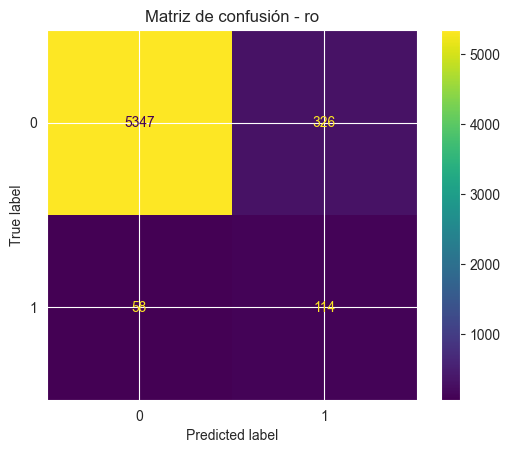

AUC-ROC (train): 0.9975
AUC-ROC (test) : 0.8785
PR-AUC  (train): 0.9215
PR-AUC  (test) : 0.5058


In [17]:
from src.model_utils.mod_evaluation import run_model_and_evaluate
from sklearn.ensemble import RandomForestClassifier


{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 14, 'max_features': 'sqrt', 'max_samples': 0.9, 'min_samples_leaf': 3, 'min_samples_split': 2}
{'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'max_depth': 18, 'max_features': 0.3, 'max_samples': 0.9, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 1000}
{'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'max_depth': 18, 'max_features': 0.3, 'max_samples': 0.9, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 1000}


model = RandomForestClassifier(
            n_estimators=1000, random_state=42,
            n_jobs=-1,
            max_depth=18,
            min_samples_leaf=3,
            min_samples_split=2,
            max_features=0.3,
            bootstrap=True,
            class_weight='balanced',
            max_samples=0.9,
            ccp_alpha=0.0
        )

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model
            )
results.append({**ex, **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "svm_smote", 0.1
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "svm_smote", 0.05
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "ro", 0.05
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'ro', model,
                "svm_smote", 0.1
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})


[XGBoost] Accuracy train: 0.9528 | test: 0.9389
[XGBoost] Balanced Acc train: 0.8790 | test: 0.8079
[XGBoost] Precision(1): 0.2771 | Recall(1): 0.6686 | F1(1): 0.3918
[XGBoost] Confusion matrix (test):
[[5373  300]
 [  57  115]]


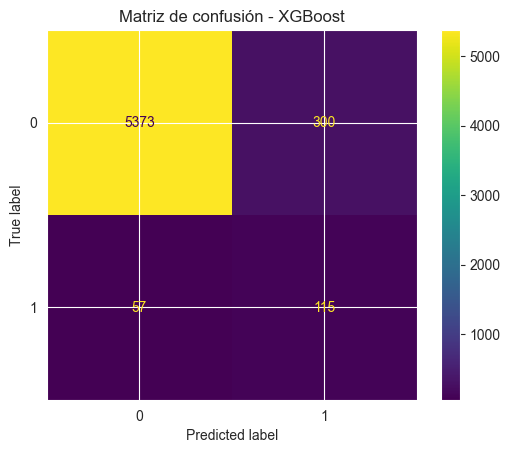

AUC-ROC (train): 0.9720
AUC-ROC (test) : 0.8867
PR-AUC  (train): 0.7132
PR-AUC  (test) : 0.5289
[XGBoost] Accuracy train: 0.9621 | test: 0.9362
[XGBoost] Balanced Acc train: 0.8520 | test: 0.7924
[XGBoost] Precision(1): 0.2613 | Recall(1): 0.6395 | F1(1): 0.3710
[XGBoost] Confusion matrix (test):
[[5362  311]
 [  62  110]]


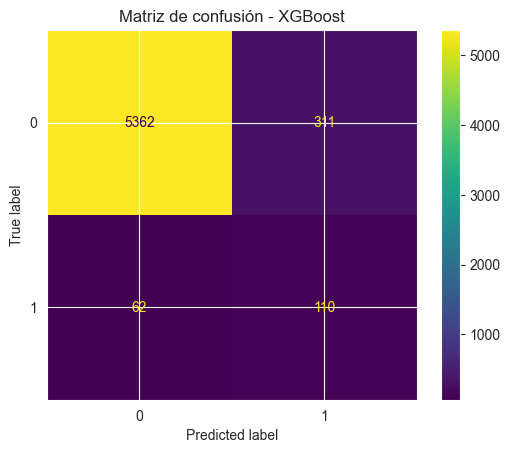

AUC-ROC (train): 0.9632
AUC-ROC (test) : 0.8766
PR-AUC  (train): 0.6883
PR-AUC  (test) : 0.5359
[XGBoost] Accuracy train: 0.9667 | test: 0.8743
[XGBoost] Balanced Acc train: 0.8247 | test: 0.7661
[XGBoost] Precision(1): 0.1423 | Recall(1): 0.6512 | F1(1): 0.2336
[XGBoost] Confusion matrix (test):
[[4998  675]
 [  60  112]]


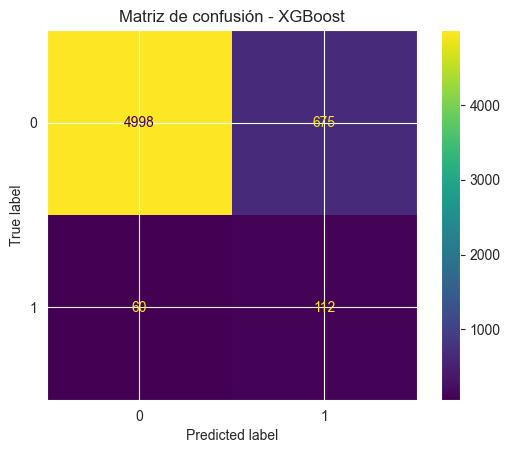

AUC-ROC (train): 0.9536
AUC-ROC (test) : 0.8648
PR-AUC  (train): 0.6514
PR-AUC  (test) : 0.4382
[XGBoost] Accuracy train: 0.9606 | test: 0.9512
[XGBoost] Balanced Acc train: 0.8753 | test: 0.8029
[XGBoost] Precision(1): 0.3313 | Recall(1): 0.6453 | F1(1): 0.4379
[XGBoost] Confusion matrix (test):
[[5449  224]
 [  61  111]]


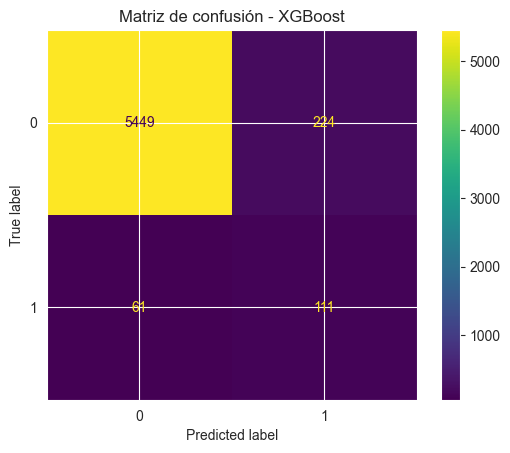

AUC-ROC (train): 0.9662
AUC-ROC (test) : 0.8921
PR-AUC  (train): 0.7075
PR-AUC  (test) : 0.5446
[XGBoost] Accuracy train: 0.9706 | test: 0.9634
[XGBoost] Balanced Acc train: 0.8275 | test: 0.7754
[XGBoost] Precision(1): 0.4125 | Recall(1): 0.5756 | F1(1): 0.4806
[XGBoost] Confusion matrix (test):
[[5532  141]
 [  73   99]]


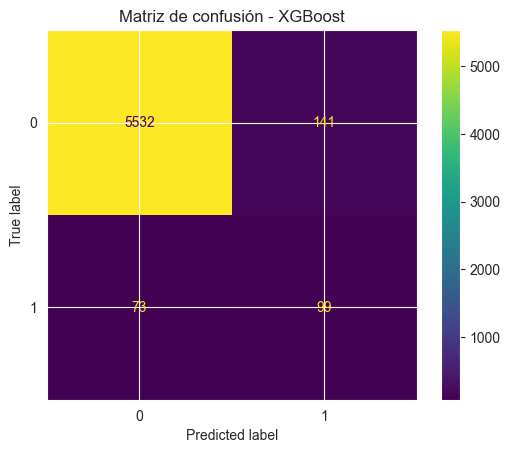

AUC-ROC (train): 0.9692
AUC-ROC (test) : 0.8861
PR-AUC  (train): 0.6950
PR-AUC  (test) : 0.5225


In [7]:
from src.model_utils.mod_evaluation import run_model_and_evaluate
from xgboost import XGBClassifier


model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="aucpr",      # coherente con PR-AUC
    tree_method="hist",       # rápido
    n_jobs=-1,
    random_state=42,
    colsample_bytree=0.8,
    gamma=0.0,
    learning_rate=0.03,
    max_depth=5,
    min_child_weight=6,
    n_estimators=300,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=6,
    subsample=0.9,
)

{'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 10, 'subsample': 0.9}
{'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 8, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 8, 'subsample': 0.9}
{'colsample_bytree': 0.8, 'gamma': 0.0, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 6, 'subsample': 0.9}
{'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 300, 'reg_alpha': 1, 'reg_lambda': 0.5, 'scale_pos_weight': 5, 'subsample': 1.0}

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'XGBoost',model
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'XGBoost',model, "svm_smote", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'XGBoost',model, "svm_smote", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})
rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'XGBoost',model, "ro", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'XGBoost',model, "ro", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})


[XGBoost] Accuracy train: 0.9562 | test: 0.9454
[XGBoost] Balanced Acc train: 0.8864 | test: 0.7999
[XGBoost] Precision(1): 0.3008 | Recall(1): 0.6453 | F1(1): 0.4104
[XGBoost] Confusion matrix (test):
[[5415  258]
 [  61  111]]


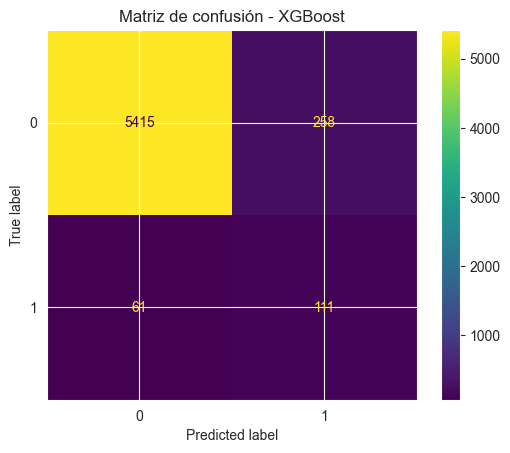

AUC-ROC (train): 0.9639
AUC-ROC (test) : 0.8824
PR-AUC  (train): 0.6992
PR-AUC  (test) : 0.5354
[XGBoost] Accuracy train: 0.9565 | test: 0.8770
[XGBoost] Balanced Acc train: 0.8865 | test: 0.8041
[XGBoost] Precision(1): 0.1568 | Recall(1): 0.7267 | F1(1): 0.2580
[XGBoost] Confusion matrix (test):
[[5001  672]
 [  47  125]]


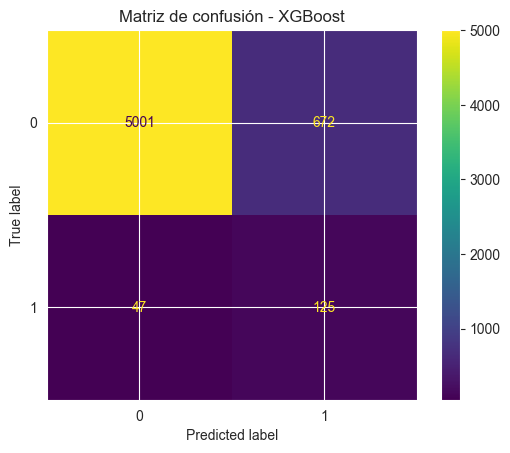

AUC-ROC (train): 0.9628
AUC-ROC (test) : 0.8768
PR-AUC  (train): 0.6944
PR-AUC  (test) : 0.5070
[XGBoost] Accuracy train: 0.9791 | test: 0.9244
[XGBoost] Balanced Acc train: 0.8326 | test: 0.7609
[XGBoost] Precision(1): 0.2140 | Recall(1): 0.5872 | F1(1): 0.3137
[XGBoost] Confusion matrix (test):
[[5302  371]
 [  71  101]]


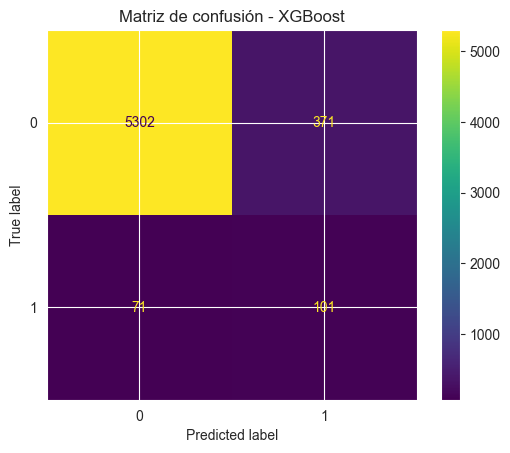

AUC-ROC (train): 0.9676
AUC-ROC (test) : 0.8645
PR-AUC  (train): 0.7350
PR-AUC  (test) : 0.4526
[XGBoost] Accuracy train: 0.9591 | test: 0.9547
[XGBoost] Balanced Acc train: 0.8611 | test: 0.7962
[XGBoost] Precision(1): 0.3495 | Recall(1): 0.6279 | F1(1): 0.4491
[XGBoost] Confusion matrix (test):
[[5472  201]
 [  64  108]]


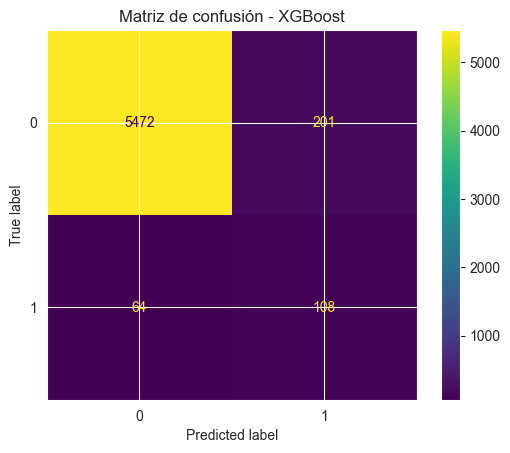

AUC-ROC (train): 0.9527
AUC-ROC (test) : 0.8792
PR-AUC  (train): 0.6564
PR-AUC  (test) : 0.5275
[XGBoost] Accuracy train: 0.9650 | test: 0.9571
[XGBoost] Balanced Acc train: 0.8543 | test: 0.7834
[XGBoost] Precision(1): 0.3614 | Recall(1): 0.5988 | F1(1): 0.4508
[XGBoost] Confusion matrix (test):
[[5491  182]
 [  69  103]]


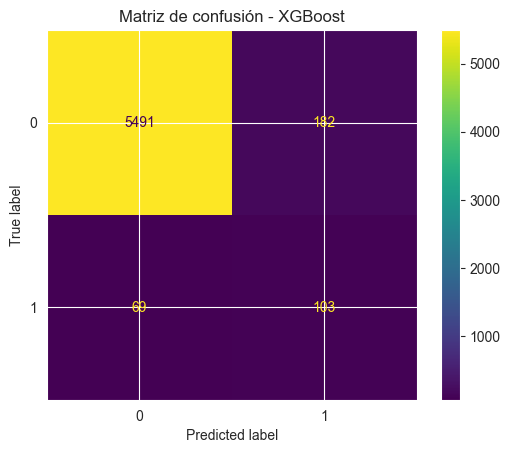

AUC-ROC (train): 0.9619
AUC-ROC (test) : 0.8759
PR-AUC  (train): 0.6756
PR-AUC  (test) : 0.5221


In [3]:
from src.model_utils.mod_evaluation import run_model_and_evaluate_xgb2

xgb_params = {
    "colsample_bytree": 0.7,
    "gamma": 0.3,
    "learning_rate": 0.03,
    "max_depth": 6,
    "min_child_weight": 6,
    "n_estimators": 6000,
    "reg_alpha": 1,
    "reg_lambda": 0.5,
    "scale_pos_weight": 5,
    "subsample": 1.0
}

xgb_params = {
    "colsample_bytree": 0.8,
    "gamma": 0.0,
    "learning_rate": 0.03,
    "max_depth": 5,
    "min_child_weight": 6,
    "n_estimators": 6000,
    "reg_alpha": 0,
    "reg_lambda": 1,
    "scale_pos_weight": 6,
    "subsample": 0.9
}



rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb2(
                X_train, y_train,
                X_test, y_test, xgb_params
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb2(
                X_train, y_train,
                X_test, y_test, xgb_params, "svm_smote", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb2(
                X_train, y_train,
                X_test, y_test, xgb_params, "svm_smote", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})
rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb2(
                X_train, y_train,
                X_test, y_test, xgb_params, "ro", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb2(
                X_train, y_train,
                X_test, y_test, xgb_params, "ro", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

[LigthGBM] Accuracy train: 0.9718 | test: 0.9093
[LigthGBM] Balanced Acc train: 0.9855 | test: 0.7729
[LigthGBM] Precision(1): 0.1882 | Recall(1): 0.6279 | F1(1): 0.2895
[LigthGBM] Confusion matrix (test):
[[5207  466]
 [  64  108]]


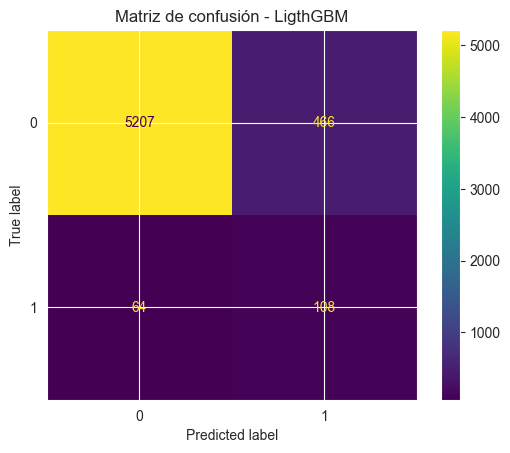

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8663
PR-AUC  (train): 0.9986
PR-AUC  (test) : 0.4567
[LigthGBM] Accuracy train: 0.9813 | test: 0.8529
[LigthGBM] Balanced Acc train: 0.9904 | test: 0.7720
[LigthGBM] Precision(1): 0.1277 | Recall(1): 0.6860 | F1(1): 0.2153
[LigthGBM] Confusion matrix (test):
[[4867  806]
 [  54  118]]


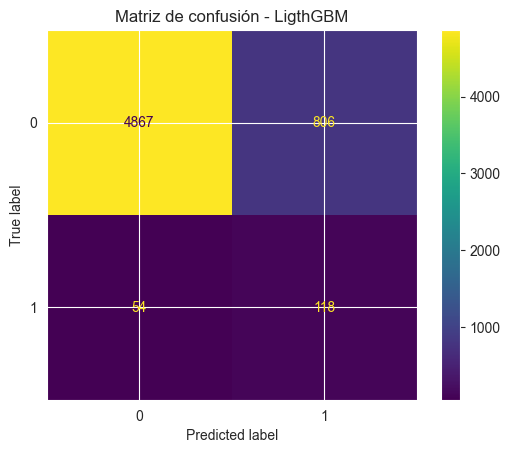

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8593
PR-AUC  (train): 0.9973
PR-AUC  (test) : 0.4301
[LigthGBM] Accuracy train: 0.9829 | test: 0.6464
[LigthGBM] Balanced Acc train: 0.9912 | test: 0.7417
[LigthGBM] Precision(1): 0.0664 | Recall(1): 0.8430 | F1(1): 0.1230
[LigthGBM] Confusion matrix (test):
[[3633 2040]
 [  27  145]]


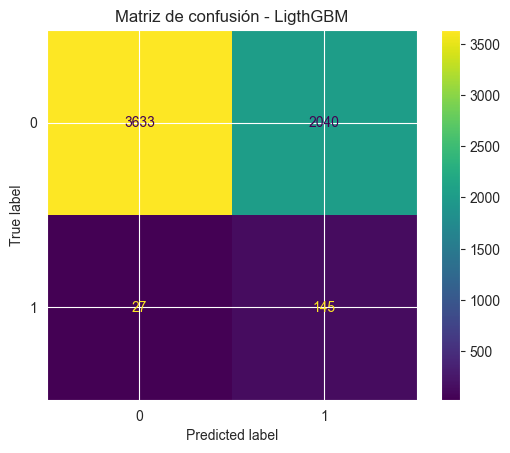

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8342
PR-AUC  (train): 0.9988
PR-AUC  (test) : 0.3289
[LigthGBM] Accuracy train: 0.9911 | test: 0.9343
[LigthGBM] Balanced Acc train: 0.9954 | test: 0.7632
[LigthGBM] Precision(1): 0.2427 | Recall(1): 0.5814 | F1(1): 0.3425
[LigthGBM] Confusion matrix (test):
[[5361  312]
 [  72  100]]


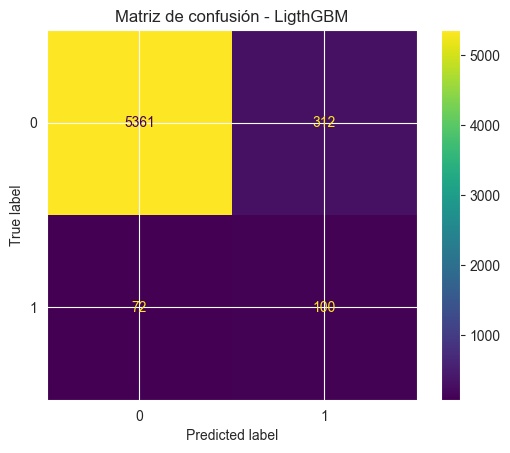

AUC-ROC (train): 0.9999
AUC-ROC (test) : 0.8673
PR-AUC  (train): 0.9970
PR-AUC  (test) : 0.4515
[LigthGBM] Accuracy train: 0.9820 | test: 0.9266
[LigthGBM] Balanced Acc train: 0.9907 | test: 0.7733
[LigthGBM] Precision(1): 0.2248 | Recall(1): 0.6105 | F1(1): 0.3286
[LigthGBM] Confusion matrix (test):
[[5311  362]
 [  67  105]]


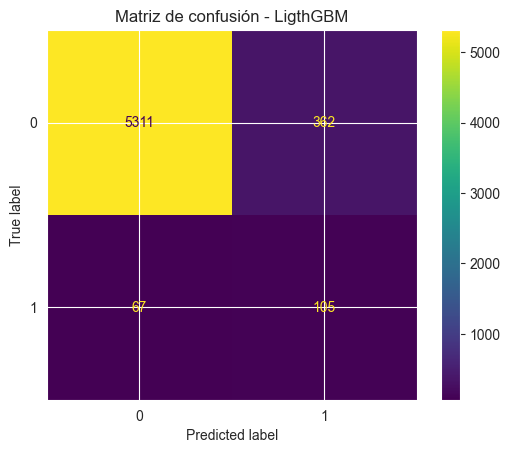

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8680
PR-AUC  (train): 0.9977
PR-AUC  (test) : 0.4716


In [50]:
from src.model_utils.mod_evaluation import run_model_and_evaluate
from lightgbm import LGBMClassifier

model = LGBMClassifier(
            objective="binary",
            random_state=42,
            n_estimators=1200,
            learning_rate=0.03,
            subsample_freq=1,
            max_depth=-1,
            subsample=0.6,
            colsample_bytree=0.9,
            min_child_samples=75,
            scale_pos_weight=spw,
            num_leaves=127,
            reg_alpha=0.0,
            reg_lambda=8,
            n_jobs=-1,
            min_split_gain=0.1
        )


{'colsample_bytree': 0.8, 'learning_rate': 0.03, 'max_depth': -1, 'min_child_samples': 60, 'n_estimators': 1200, 'num_leaves': 31, 'reg_alpha': 0.5, 'reg_lambda': 5.0, 'subsample': 0.7}
{'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': -1, 'min_child_samples': 75, 'min_split_gain': 0.1, 'n_estimators': 1200, 'num_leaves': 127, 'reg_alpha': 0.0, 'reg_lambda': 8.0, 'subsample': 0.6}
{'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': -1, 'min_child_samples': 140, 'min_split_gain': 0.1, 'n_estimators': 1200, 'num_leaves': 127, 'reg_alpha': 0.0, 'reg_lambda': 5.0, 'subsample': 0.55}

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "svm_smote", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "svm_smote", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})
rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "ro", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "ro", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})


In [64]:
import pandas as pd

results

df_res = pd.DataFrame(results)

df_res

,threshold,val_precision_at_threshold,val_recall_at_threshold,val_fbeta_at_threshold,sampler,ratio,model,train_accuracy,test_accuracy,train_balanced_accuracy,...,tn,fp,fn,tp,conf_matrix,classification_report,auc-roc-train,auc-roc-test,pr-auc-train,pr-auc-test
0,0.259705,0.356863,0.664234,0.566625,None,NaN,Random_Forest,0.972878,0.955689,0.986028,...,5481,192,67,105,"[[5481, 192], [67, 105]]","{'0': {'precision': 0.9879235760634463, 'recal...",0.997342,0.885708,0.910986,0.527000
1,0.266736,0.337121,0.649635,0.548030,svm_smote,0.10,Random_Forest,0.971039,0.932250,0.985081,...,5334,339,57,115,"[[5334, 339], [57, 115]]","{'0': {'precision': 0.9894268224819143, 'recal...",0.995739,0.881209,0.877425,0.505221
2,0.273955,0.359684,0.664234,0.568040,svm_smote,0.05,Random_Forest,0.972921,0.955689,0.986051,...,5480,193,66,106,"[[5480, 193], [66, 106]]","{'0': {'precision': 0.9880995311936531, 'recal...",0.996963,0.895241,0.904041,0.535181
3,0.320933,0.375000,0.635036,0.557692,ro,0.05,Random_Forest,0.976258,0.958426,0.987769,...,5500,173,70,102,"[[5500, 173], [70, 102]]","{'0': {'precision': 0.9874326750448833, 'recal...",0.997738,0.892910,0.935466,0.525229
4,0.266736,0.337121,0.649635,0.548030,svm_smote,0.10,ro,0.971039,0.932250,0.985081,...,5334,339,57,115,"[[5334, 339], [57, 115]]","{'0': {'precision': 0.9894268224819143, 'recal...",0.995739,0.881209,0.877425,0.505221
5,0.301284,0.340741,0.671533,0.562347,None,NaN,XGBoost,0.973220,0.931394,0.986205,...,5339,334,67,105,"[[5339, 334], [67, 105]]","{'0': {'precision': 0.987606363300037, 'recall...",0.999856,0.871471,0.993556,0.484370
6,0.399700,0.365145,0.642336,0.557668,svm_smote,0.05,XGBoost,0.978910,0.883148,0.989136,...,5045,628,55,117,"[[5045, 628], [55, 117]]","{'0': {'precision': 0.9892156862745098, 'recal...",0.999846,0.868293,0.993496,0.457595
7,0.492580,0.384615,0.620438,0.552666,svm_smote,0.10,XGBoost,0.983787,0.684346,0.991648,...,3862,1811,34,138,"[[3862, 1811], [34, 138]]","{'0': {'precision': 0.9912731006160165, 'recal...",0.999826,0.839795,0.992933,0.350433
8,0.428093,0.400922,0.635036,0.568627,ro,0.05,XGBoost,0.981391,0.940975,0.990414,...,5397,276,69,103,"[[5397, 276], [69, 103]]","{'0': {'precision': 0.9873765093304061, 'recal...",0.999817,0.873544,0.992717,0.480705
9,0.301284,0.340741,0.671533,0.562347,None,NaN,LigthGBM,0.973220,0.931394,0.986205,...,5339,334,67,105,"[[5339, 334], [67, 105]]","{'0': {'precision': 0.987606363300037, 'recall...",0.999856,0.871471,0.993556,0.484370
